In [72]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn import model_selection
from imblearn.over_sampling import SMOTE


In [3]:
df = pd.read_csv('archive/diabetes_prediction_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

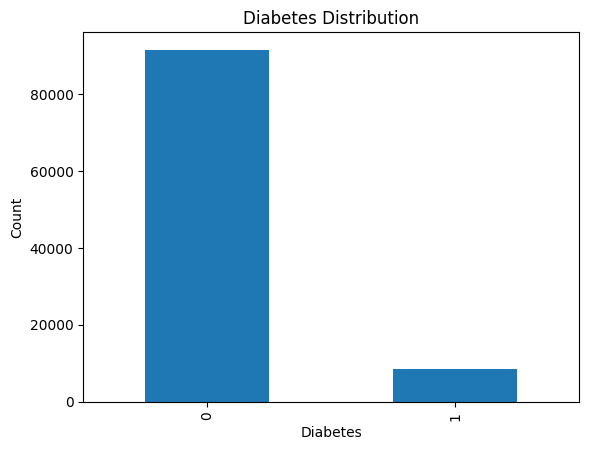

In [8]:
diabetes_count = df['diabetes'].value_counts()
diabetes_count.plot(kind='bar')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Distribution')
plt.show()

In [9]:
df['heart_disease'].unique()

array([1, 0])

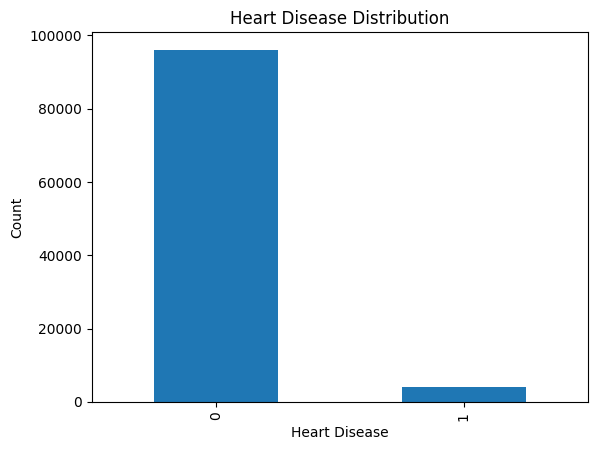

In [10]:
heart_disease_count = df['heart_disease'].value_counts()
heart_disease_count.plot(kind='bar')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Heart Disease Distribution')
plt.show()

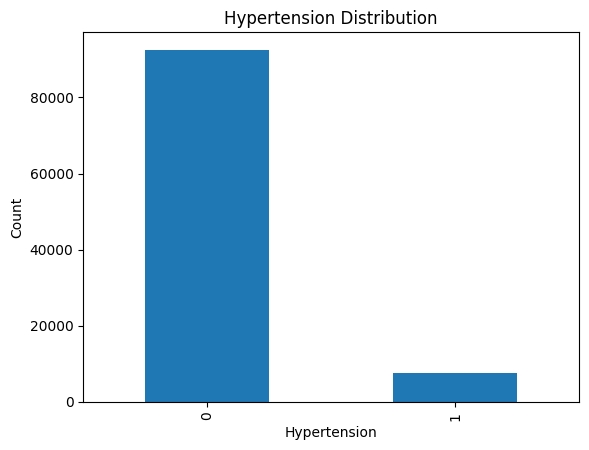

In [11]:
hypertension_count = df['hypertension'].value_counts()
hypertension_count.plot(kind='bar')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Hypertension Distribution')
plt.show()

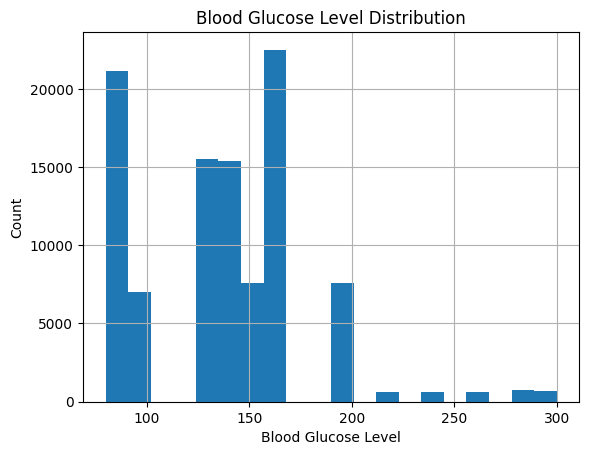

In [12]:
df['blood_glucose_level'].hist(bins=20)
plt.xlabel('Blood Glucose Level')
plt.ylabel('Count')
plt.title('Blood Glucose Level Distribution')
plt.show()

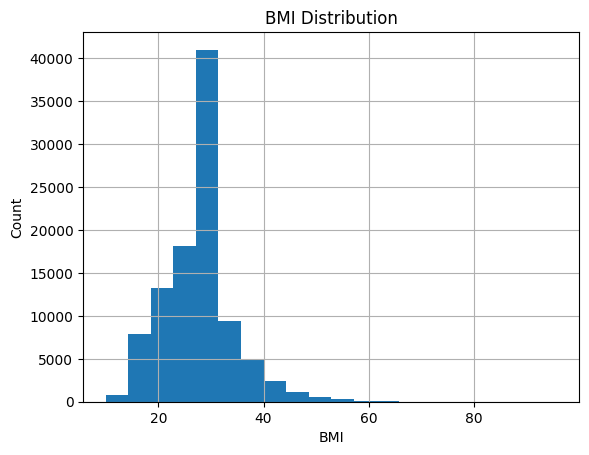

In [13]:
df['bmi'].hist(bins=20)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')
plt.show()

In [14]:
gender_count = df['gender'].value_counts()
gender_count

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

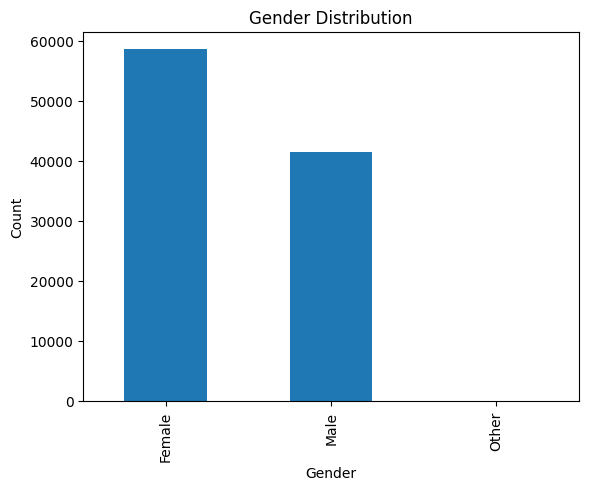

In [15]:
gender_count.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

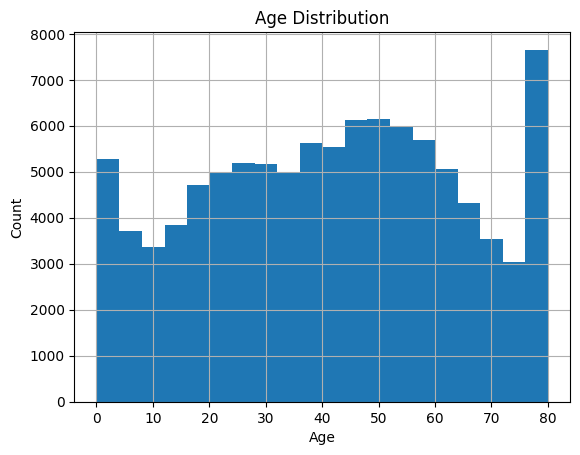

In [16]:
df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [17]:
df['age_range'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
age_range_count = df['age_range'].value_counts()
age_range_count

age_range
50-60     14831
40-50     14665
30-40     13139
20-30     12829
70-80     12356
60-70     11276
0-10      10622
10-20     10282
80-90         0
90-100        0
Name: count, dtype: int64

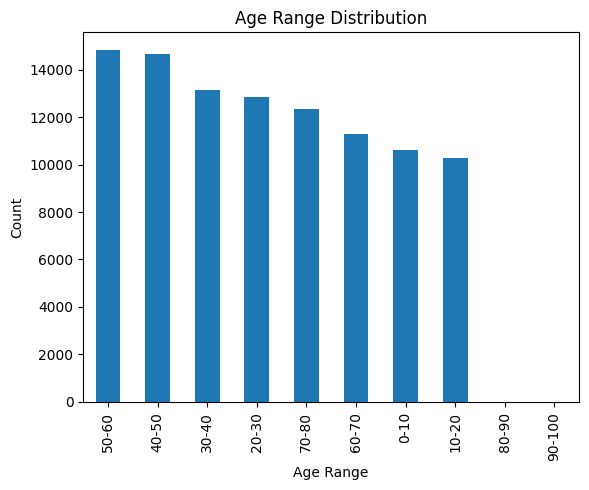

In [18]:
age_range_count.plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Range Distribution')
plt.show()

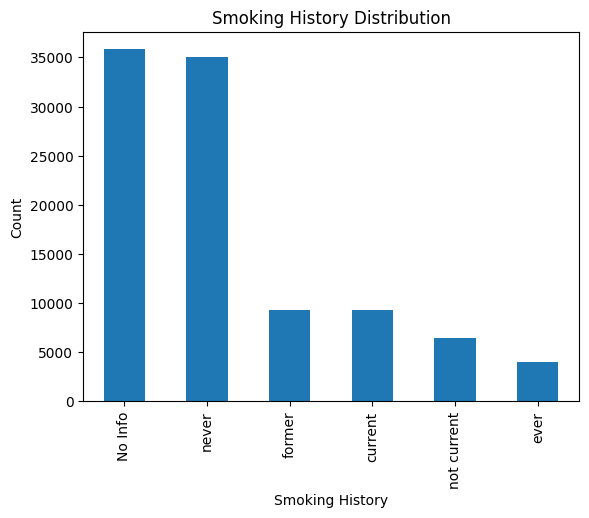

In [19]:
  smoking_history_count = df['smoking_history'].value_counts()
  smoking_history_count.plot(kind='bar')
  plt.xlabel('Smoking History')
  plt.ylabel('Count')
  plt.title('Smoking History Distribution')
  plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  object  
 1   age                  100000 non-null  float64 
 2   hypertension         100000 non-null  int64   
 3   heart_disease        100000 non-null  int64   
 4   smoking_history      100000 non-null  object  
 5   bmi                  100000 non-null  float64 
 6   HbA1c_level          100000 non-null  float64 
 7   blood_glucose_level  100000 non-null  int64   
 8   diabetes             100000 non-null  int64   
 9   age_range            100000 non-null  category
dtypes: category(1), float64(3), int64(4), object(2)
memory usage: 7.0+ MB


In [22]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0
99996,2.0,0,0,17.37,6.5,100,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0


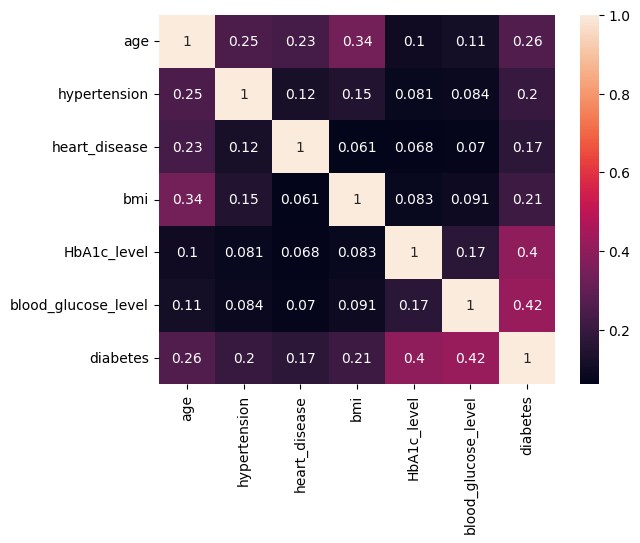

In [23]:
correlation = df_numeric.corr()
sns.heatmap(correlation, annot=True)
plt.show()

All variables showed positive correlation with diabetes. Among that, as expected blood_glucose_level and HbA1c_level showed high positive correlation with diabetes.


In [24]:
df_diabetes = df[df['diabetes'] == 1]
df_diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_range
6,Female,44.0,0,0,never,19.31,6.5,200,1,40-50
26,Male,67.0,0,1,not current,27.32,6.5,200,1,60-70
38,Male,50.0,1,0,current,27.32,5.7,260,1,40-50
40,Male,73.0,0,0,former,25.91,9.0,160,1,70-80
53,Female,53.0,0,0,former,27.32,7.0,159,1,50-60
...,...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1,60-70
99938,Male,55.0,0,1,former,30.42,6.2,300,1,50-60
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1,60-70
99962,Female,58.0,1,0,never,38.31,7.0,200,1,50-60


In [25]:
smoking_diabetes = df_diabetes.groupby("smoking_history")["diabetes"].count()
smoking_diabetes

smoking_history
No Info        1454
current         948
ever            472
former         1590
never          3346
not current     690
Name: diabetes, dtype: int64

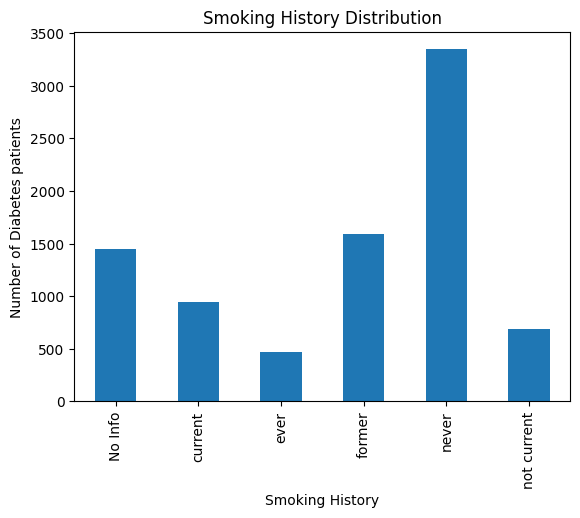

In [26]:
smoking_diabetes.plot(kind='bar')
plt.xlabel('Smoking History')
plt.ylabel('Number of Diabetes patients')
plt.title('Smoking History Distribution')
plt.show()

In [27]:
heart_disease_diabetes = df_diabetes.groupby("heart_disease")["diabetes"].count()
hypertension_diabetes = df_diabetes.groupby("hypertension")["diabetes"].count()
heart_disease_diabetes

heart_disease
0    7233
1    1267
Name: diabetes, dtype: int64

In [28]:
hypertension_diabetes

hypertension
0    6412
1    2088
Name: diabetes, dtype: int64

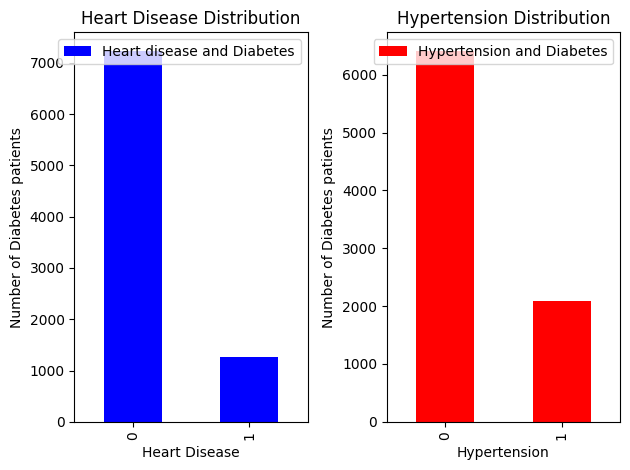

In [29]:
plt.subplot(1, 2, 1)

heart_disease_diabetes.plot(kind='bar', color='blue', label="Heart disease and Diabetes")
plt.xlabel('Heart Disease')
plt.ylabel('Number of Diabetes patients')
plt.title('Heart Disease Distribution')
plt.legend()
plt

plt.subplot(1, 2, 2)
hypertension_diabetes.plot(kind='bar', color='red', label="Hypertension and Diabetes")
plt.xlabel('Hypertension')
plt.ylabel('Number of Diabetes patients')
plt.title('Hypertension Distribution')
plt.tight_layout()
plt.legend()
plt.show()

In [30]:
hba1c_count = df['HbA1c_level'].value_counts()
hba1c_count

HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.2     661
8.8     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_9100\855634504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='heart_disease', y='HbA1c_level', data=df, palette='muted')


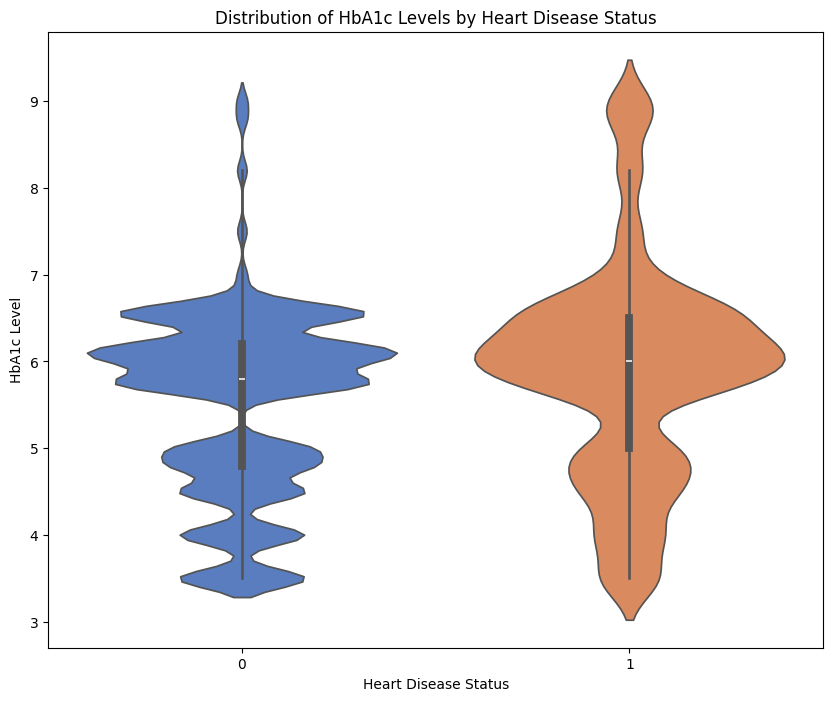

In [31]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='heart_disease', y='HbA1c_level', data=df, palette='muted')

# Add labels and title
plt.xlabel('Heart Disease Status')
plt.ylabel('HbA1c Level')
plt.title('Distribution of HbA1c Levels by Heart Disease Status')

# Show the plot
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9100\2716109228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='hypertension', y='HbA1c_level', data=df, palette='muted')


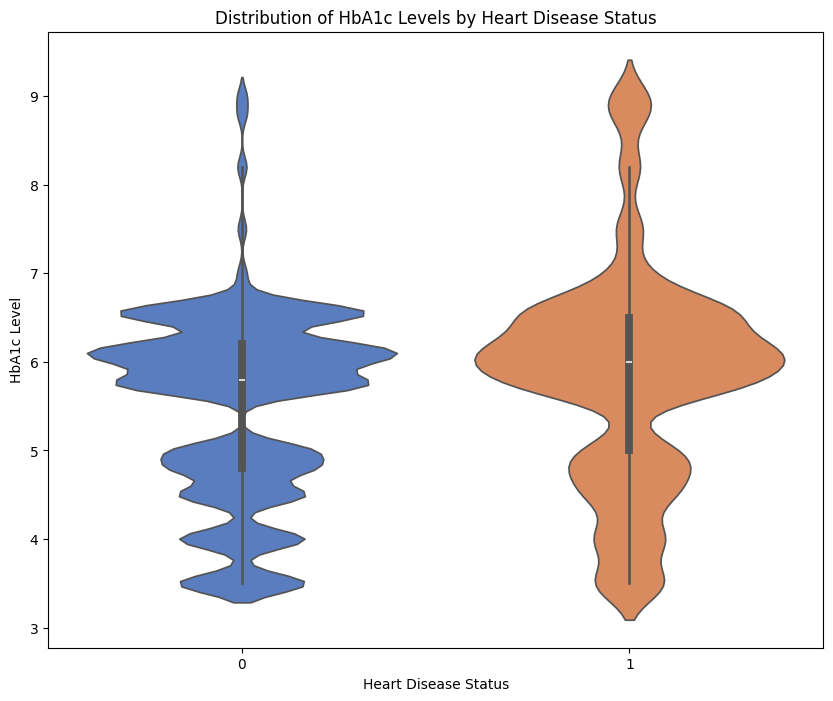

In [32]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='hypertension', y='HbA1c_level', data=df, palette='muted')

# Add labels and title
plt.xlabel('Heart Disease Status')
plt.ylabel('HbA1c Level')
plt.title('Distribution of HbA1c Levels by Heart Disease Status')

# Show the plot
plt.show()

In [33]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  object  
 1   age                  100000 non-null  float64 
 2   hypertension         100000 non-null  int64   
 3   heart_disease        100000 non-null  int64   
 4   smoking_history      100000 non-null  object  
 5   bmi                  100000 non-null  float64 
 6   HbA1c_level          100000 non-null  float64 
 7   blood_glucose_level  100000 non-null  int64   
 8   diabetes             100000 non-null  int64   
 9   age_range            100000 non-null  category
dtypes: category(1), float64(3), int64(4), object(2)
memory usage: 7.0+ MB


In [35]:
df1 = df.drop(columns=['age'], axis=1)
df1

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_range
0,Female,0,1,never,25.19,6.6,140,0,70-80
1,Female,0,0,No Info,27.32,6.6,80,0,50-60
2,Male,0,0,never,27.32,5.7,158,0,20-30
3,Female,0,0,current,23.45,5.0,155,0,30-40
4,Male,1,1,current,20.14,4.8,155,0,70-80
...,...,...,...,...,...,...,...,...,...
99995,Female,0,0,No Info,27.32,6.2,90,0,70-80
99996,Female,0,0,No Info,17.37,6.5,100,0,0-10
99997,Male,0,0,former,27.83,5.7,155,0,60-70
99998,Female,0,0,never,35.42,4.0,100,0,20-30


Preprocessing

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['gender'] = le.fit_transform(df1['gender'])
le.classes_

array(['Female', 'Male', 'Other'], dtype=object)

In [37]:
df1['smoking_history'] = le.fit_transform(df1['smoking_history'])
le.classes_

array(['No Info', 'current', 'ever', 'former', 'never', 'not current'],
      dtype=object)

In [38]:
df1['age_range'] = le.fit_transform(df1['age_range'])
le.classes_

array(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
       '70-80'], dtype=object)

In [39]:
df1

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_range
0,0,0,1,4,25.19,6.6,140,0,7
1,0,0,0,0,27.32,6.6,80,0,5
2,1,0,0,4,27.32,5.7,158,0,2
3,0,0,0,1,23.45,5.0,155,0,3
4,1,1,1,1,20.14,4.8,155,0,7
...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,27.32,6.2,90,0,7
99996,0,0,0,0,17.37,6.5,100,0,0
99997,1,0,0,3,27.83,5.7,155,0,6
99998,0,0,0,4,35.42,4.0,100,0,2


Train and Test split

In [40]:
proprotion_of_diabetes = df1['diabetes'].value_counts(normalize=True) * 100
proprotion_of_diabetes

diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64

The dataset is imbalanced, so we use stratify while split the train test dataset

In [ ]:

X = df1.drop(columns=['diabetes'], axis=1)
y = df1['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [42]:
X_train

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,age_range
74736,0,1,0,3,27.32,6.5,145,7
36589,0,0,0,4,25.18,4.5,126,1
37414,0,0,0,0,25.95,6.6,200,3
71251,0,0,0,1,23.43,6.0,159,3
40454,0,0,0,0,22.62,5.0,90,2
...,...,...,...,...,...,...,...,...
17083,0,0,0,4,32.28,4.8,130,3
27250,1,0,0,4,27.32,6.2,158,4
33409,0,1,0,3,27.32,5.8,155,5
91639,0,0,0,0,15.68,6.2,155,0


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['bmi', 'blood_glucose_level', 'HbA1c_level']
columns_not_to_scale = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'age_range']

#Fit the scaler
X_train_scaled_numeric = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled_numeric = scaler.transform(X_test[columns_to_scale])

#Conver teh scaled numeric arrays back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled_numeric, columns=columns_to_scale)
X_test_scaled = pd.DataFrame(X_test_scaled_numeric, columns=columns_to_scale)

#Reattach non-numeric columns to the scaled data
X_train_scaled = pd.concat([X_train_scaled, X_train[columns_not_to_scale].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[columns_not_to_scale].reset_index(drop=True)], axis=1)



In [44]:
X_test_scaled

,bmi,blood_glucose_level,HbA1c_level,gender,hypertension,heart_disease,smoking_history,age_range
0,0.147409,0.363636,0.454545,0,0,0,3,3
1,0.202031,0.209091,0.418182,0,0,0,4,3
2,0.153945,0.090909,0.090909,1,0,0,5,5
3,0.239963,0.363636,0.272727,0,0,0,4,2
4,0.196895,0.045455,0.418182,1,0,0,4,6
...,...,...,...,...,...,...,...,...
19995,0.120098,0.000000,0.090909,0,0,0,0,2
19996,0.158613,0.227273,0.000000,0,0,0,4,3
19997,0.193277,0.359091,0.490909,0,0,0,4,3
19998,0.202031,0.022727,0.418182,0,0,0,0,7


In [45]:
X_train_scaled.describe()

,bmi,blood_glucose_level,HbA1c_level,gender,hypertension,heart_disease,smoking_history,age_range
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.201994,0.263996,0.368643,0.415075,0.074838,0.039500,2.182987,3.624975
std,0.077509,0.184829,0.194675,0.493144,0.263131,0.194783,1.889378,2.200572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158964,0.090909,0.236364,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.202031,0.272727,0.418182,0.000000,0.000000,0.000000,3.000000,4.000000
75%,0.228058,0.359091,0.490909,1.000000,0.000000,0.000000,4.000000,5.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000,7.000000


In [46]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  80000 non-null  float64
 1   blood_glucose_level  80000 non-null  float64
 2   HbA1c_level          80000 non-null  float64
 3   gender               80000 non-null  int64  
 4   hypertension         80000 non-null  int64  
 5   heart_disease        80000 non-null  int64  
 6   smoking_history      80000 non-null  int64  
 7   age_range            80000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.9 MB


In [47]:
X_test_scaled.isna().sum()

bmi                    0
blood_glucose_level    0
HbA1c_level            0
gender                 0
hypertension           0
heart_disease          0
smoking_history        0
age_range              0
dtype: int64

In [48]:
X_train_scaled.to_csv("data/processed_data/X_train_scaled.csv", index=False)
X_test_scaled.to_csv("data/processed_data/X_test_scaled.csv", index=False)
y_train.to_csv("data/processed_data/y_train.csv", index=False)
y_test.to_csv("data/processed_data/y_test.csv", index=False)

In [49]:
X_train_scaled = pd.read_csv("data/processed_data/X_train_scaled.csv")
X_test_scaled = pd.read_csv("data/processed_data/X_test_scaled.csv")
y_train = pd.read_csv("data/processed_data/y_train.csv")
y_test = pd.read_csv("data/processed_data/y_test.csv")

In [ ]:


#Initialize smote to overcome class imbalance
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train_scaled, y_train)

In [121]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("GB", GradientBoostingClassifier()))
models.append(("NB", GaussianNB()))

In [122]:
#!pip install --upgrade xgboost scikit-learn

In [123]:
import warnings
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=FutureWarning)
  warnings.filterwarnings("ignore", category=UserWarning)

  result = []
  names = []

  for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='accuracy')
    result.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.867773 (0.008827)
KNN: 0.937848 (0.018624)
DT: 0.965922 (0.015025)


KeyboardInterrupt: 

LR: 0.867070 (0.008879)
KNN: 0.937008 (0.019066)
DT: 0.966189 (0.014892)
RF: 0.969959 (0.010960)
GB: 0.954447 (0.005180)
NB: 0.826865 (0.062318)


In [ ]:
models = []
models.append(("SVM", SVC()))


import warnings

result = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='accuracy')
  result.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

c:\Users\User\OneDrive - ingenium digital diagnostics GmbH\Desktop\DataScientest\Diabetes prediction model\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM: 0.869317 (0.006934)

RandomForest model showed highest accuracy 97.08% of and the least performed model is GaussianNB with accuracy 82.73%

In [ ]:
model = RandomForestClassifier(random_state=42)

# Minimal parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],               # Number of trees in the forest
    'max_depth': [None, 10],                   # Maximum depth of trees
    'min_samples_split': [2, 10],              # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2]                 # Minimum samples required at a leaf node
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=5,                              # 5-fold cross-validation
                           verbose=2,                         # To display the progress
                           n_jobs=-1,                         # Use all CPU cores
                           scoring='accuracy')                # The metric to optimize

# Fit the model with grid search
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score * 100:.2f}%")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 97.14%


In [51]:
rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rf.fit(X_train_smote, y_train_smote)

c:\Users\User\OneDrive - ingenium digital diagnostics GmbH\Desktop\DataScientest\Diabetes prediction model\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200)

In [52]:
import joblib
joblib.dump(rf, 'models/random_forest_model.joblib')

['models/random_forest_model.joblib']

In [53]:
# Load the model
rf_loaded = joblib.load('models/random_forest_model.joblib')
y_pred = rf_loaded.predict(X_test_scaled)

In [54]:
print("Random Forest Classifier Accuracy Score:\n", accuracy_score(y_test, y_pred))

Random Forest Classifier Accuracy Score:
 0.95365


In [55]:
print("F1 score : ", f1_score(y_test, y_pred))

F1 score :  0.7329299913569577


In [56]:
print("Classification Report :\n", classification_report(y_test, y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.72      0.75      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



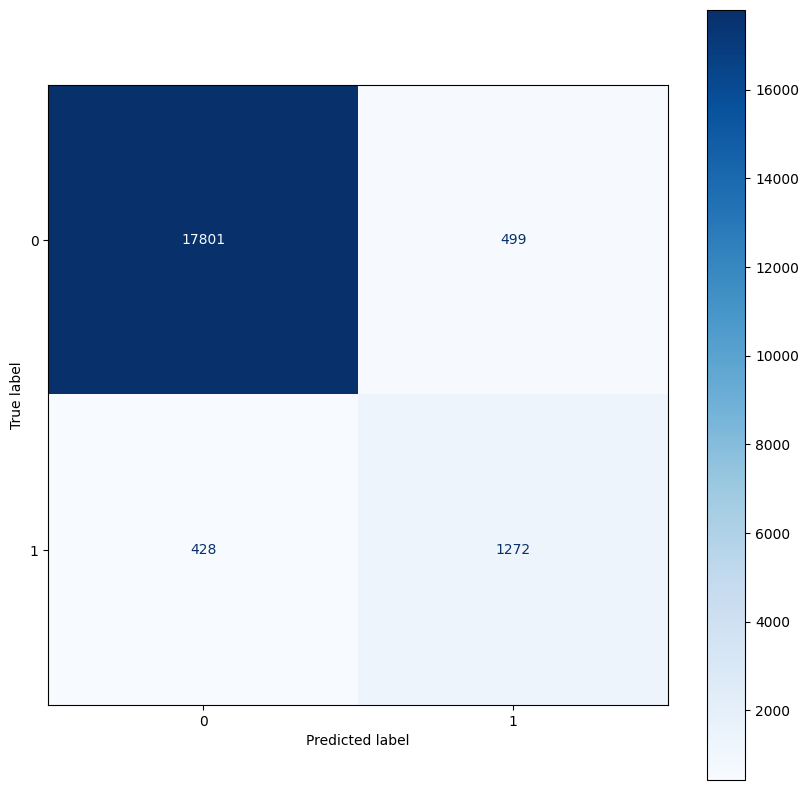

In [57]:
rf_classifier_matrix = confusion_matrix(y_test, y_pred)
rf_classifier_matrix_display = ConfusionMatrixDisplay(rf_classifier_matrix)
fig, ax = plt.subplots(figsize=(10,10))
rf_classifier_matrix_display.plot(cmap=plt.cm.Blues, ax=ax)

In [62]:
# Ensure y_test and y_pred are 1-dimensional
y_test_flat = y_test.values.flatten() if hasattr(y_test, "values") else y_test
y_pred_flat = y_pred.values.flatten() if hasattr(y_pred, "values") else y_pred

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'Actual': y_test_flat,
    'Predicted': y_pred_flat
})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'


In [63]:
#Feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importance with their corresponding feature names
importance_df = pd.DataFrame({
    'Feature': X_train_smote.columns,  # Replace with feature names
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Save the feature importance
importance_df.to_csv('metrics/feature_importance.csv', index=False)

print(importance_df)

               Feature  Importance
2          HbA1c_level    0.390668
1  blood_glucose_level    0.301672
0                  bmi    0.131919
7            age_range    0.113648
6      smoking_history    0.027620
4         hypertension    0.019903
5        heart_disease    0.009044
3               gender    0.005527


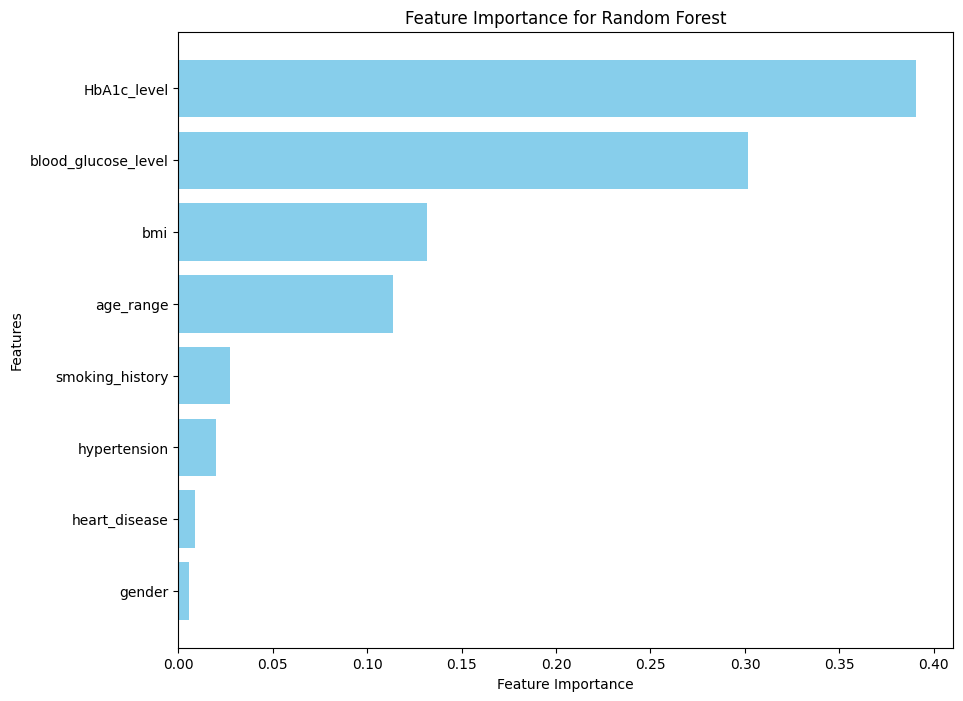

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest')
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.savefig('metrics/feature_importance_plot.png', bbox_inches='tight')
plt.show()